# What is a Neural Network?

A **neural network** in machine learning is a model inspired by how the human brain processes information. It's made up of layers of simple processing units called **neurons**, which are organized in a structure that can learn patterns from data.

A typical neural network has:
- **Input layer**: takes the raw data (like pixels in an image or features in a dataset)
- **Hidden layers**: perform transformations and extract patterns
- **Output layer**: gives the final prediction (e.g., class label, value)

Each **neuron** in a layer:
- Receives inputs
- Applies a **weight** to each input
- Sums them up, adds a **bias**
- Passes the result through an **activation function** (like ReLU or sigmoid)

# How a neuron works?

A neuron receives n+1 inputs: $x=\begin{pmatrix} x_{0}=1 & x_{1} & x_{2} & ... & x_{n} \end{pmatrix}$ (where $x_{0}=1$ is added by us to simplify the calculations with the bias $\theta_{0}$). It has a weights vector: $\theta=\begin{pmatrix} \theta_{0} & \theta_{1} & \theta_{2} & ... & \theta_{n} \end{pmatrix}$.

The neuron computes its output in two steps:
1) The neuron calculates a **weighted sum** of the inputs with a **bias** term:

$$
z = \theta_{0}\underbrace{x_{0}}_{=1} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}
$$

Or more compactly (in vector form):

$$
z = \theta^{T}x
$$

2) The result `z` is passed through an **activation function** to introduce non-linearity. Common choices:
- **Sigmoid**: squashes output to range (0, 1)
- **ReLU**: outputs 0 if z < 0, otherwise z
- **Tanh**: outputs between -1 and 1

So overall, a neuron transforms inputs like this:

$$
output = activation(\theta^{T}x)
$$

This output can be used directly (e.g., for a prediction) or passed on as input to other neurons in deeper layers.

# Why do we use activation functions?

Without activation functions, a neural network is just a series of **linear transformations**:

$$
\text{output} = W_2(W_1x + b_1) + b_2
$$

This is still a linear function of $x$, no matter how many layers you stack. **Linear models can't capture complex relationships** like curves, interactions, or high-level abstractions. You need non-linearity to make deep learning work — that's what activation functions introduce.


Activation functions apply a **non-linear transformation** to the output of each neuron, allowing the network to learn and approximate any function (this is supported by the **universal approximation theorem**).

Each activation function transforms the weighted sum of inputs in a different way, shaping how the network learns.


### Common activation functions

#### 1. **ReLU** (Rectified Linear Unit)

$$
\text{ReLU}(x) = \max(0, x)
$$

* ✅ Very fast to compute
* ✅ Helps avoid vanishing gradients
* ✅ Sparse activations (many values become 0)
* ❌ Can cause “dead neurons” (if inputs always negative)

Used heavily in **hidden layers** of deep networks.


#### 2. **Sigmoid**

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

* ✅ Smooth and differentiable
* ❌ Vanishing gradient problem (saturates near 0 and 1)
* ❌ Outputs not zero-centered (can slow down learning)

Used in **binary classification outputs** or older networks.


#### 3. **Tanh**

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

* ✅ Zero-centered output (better than sigmoid for some models)
* ❌ Still suffers from vanishing gradients at large input magnitudes

Better than sigmoid in many cases, but often replaced by ReLU variants today.


#### 4. **Leaky ReLU**

$$
\text{LeakyReLU}(x) = \begin{cases}
x & x \geq 0 \\
\alpha x & x < 0
\end{cases}
$$

* ✅ Avoids dead neurons (allows small gradient for $x < 0$)
* ❌ Slightly more complex

A minor but helpful tweak on ReLU.


#### 5. **Softmax**

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

* ✅ Converts output vector into **probabilities** that sum to 1
* ✅ Commonly used in the **output layer** of multi-class classification


### Summary

| Purpose                      | Recommended Activation |
| ---------------------------- | ---------------------- |
| Hidden layers (general)      | ReLU or Leaky ReLU     |
| Binary classification output | Sigmoid                |
| Multi-class classification   | Softmax                |
| Older/experimental models    | Tanh, Sigmoid          |


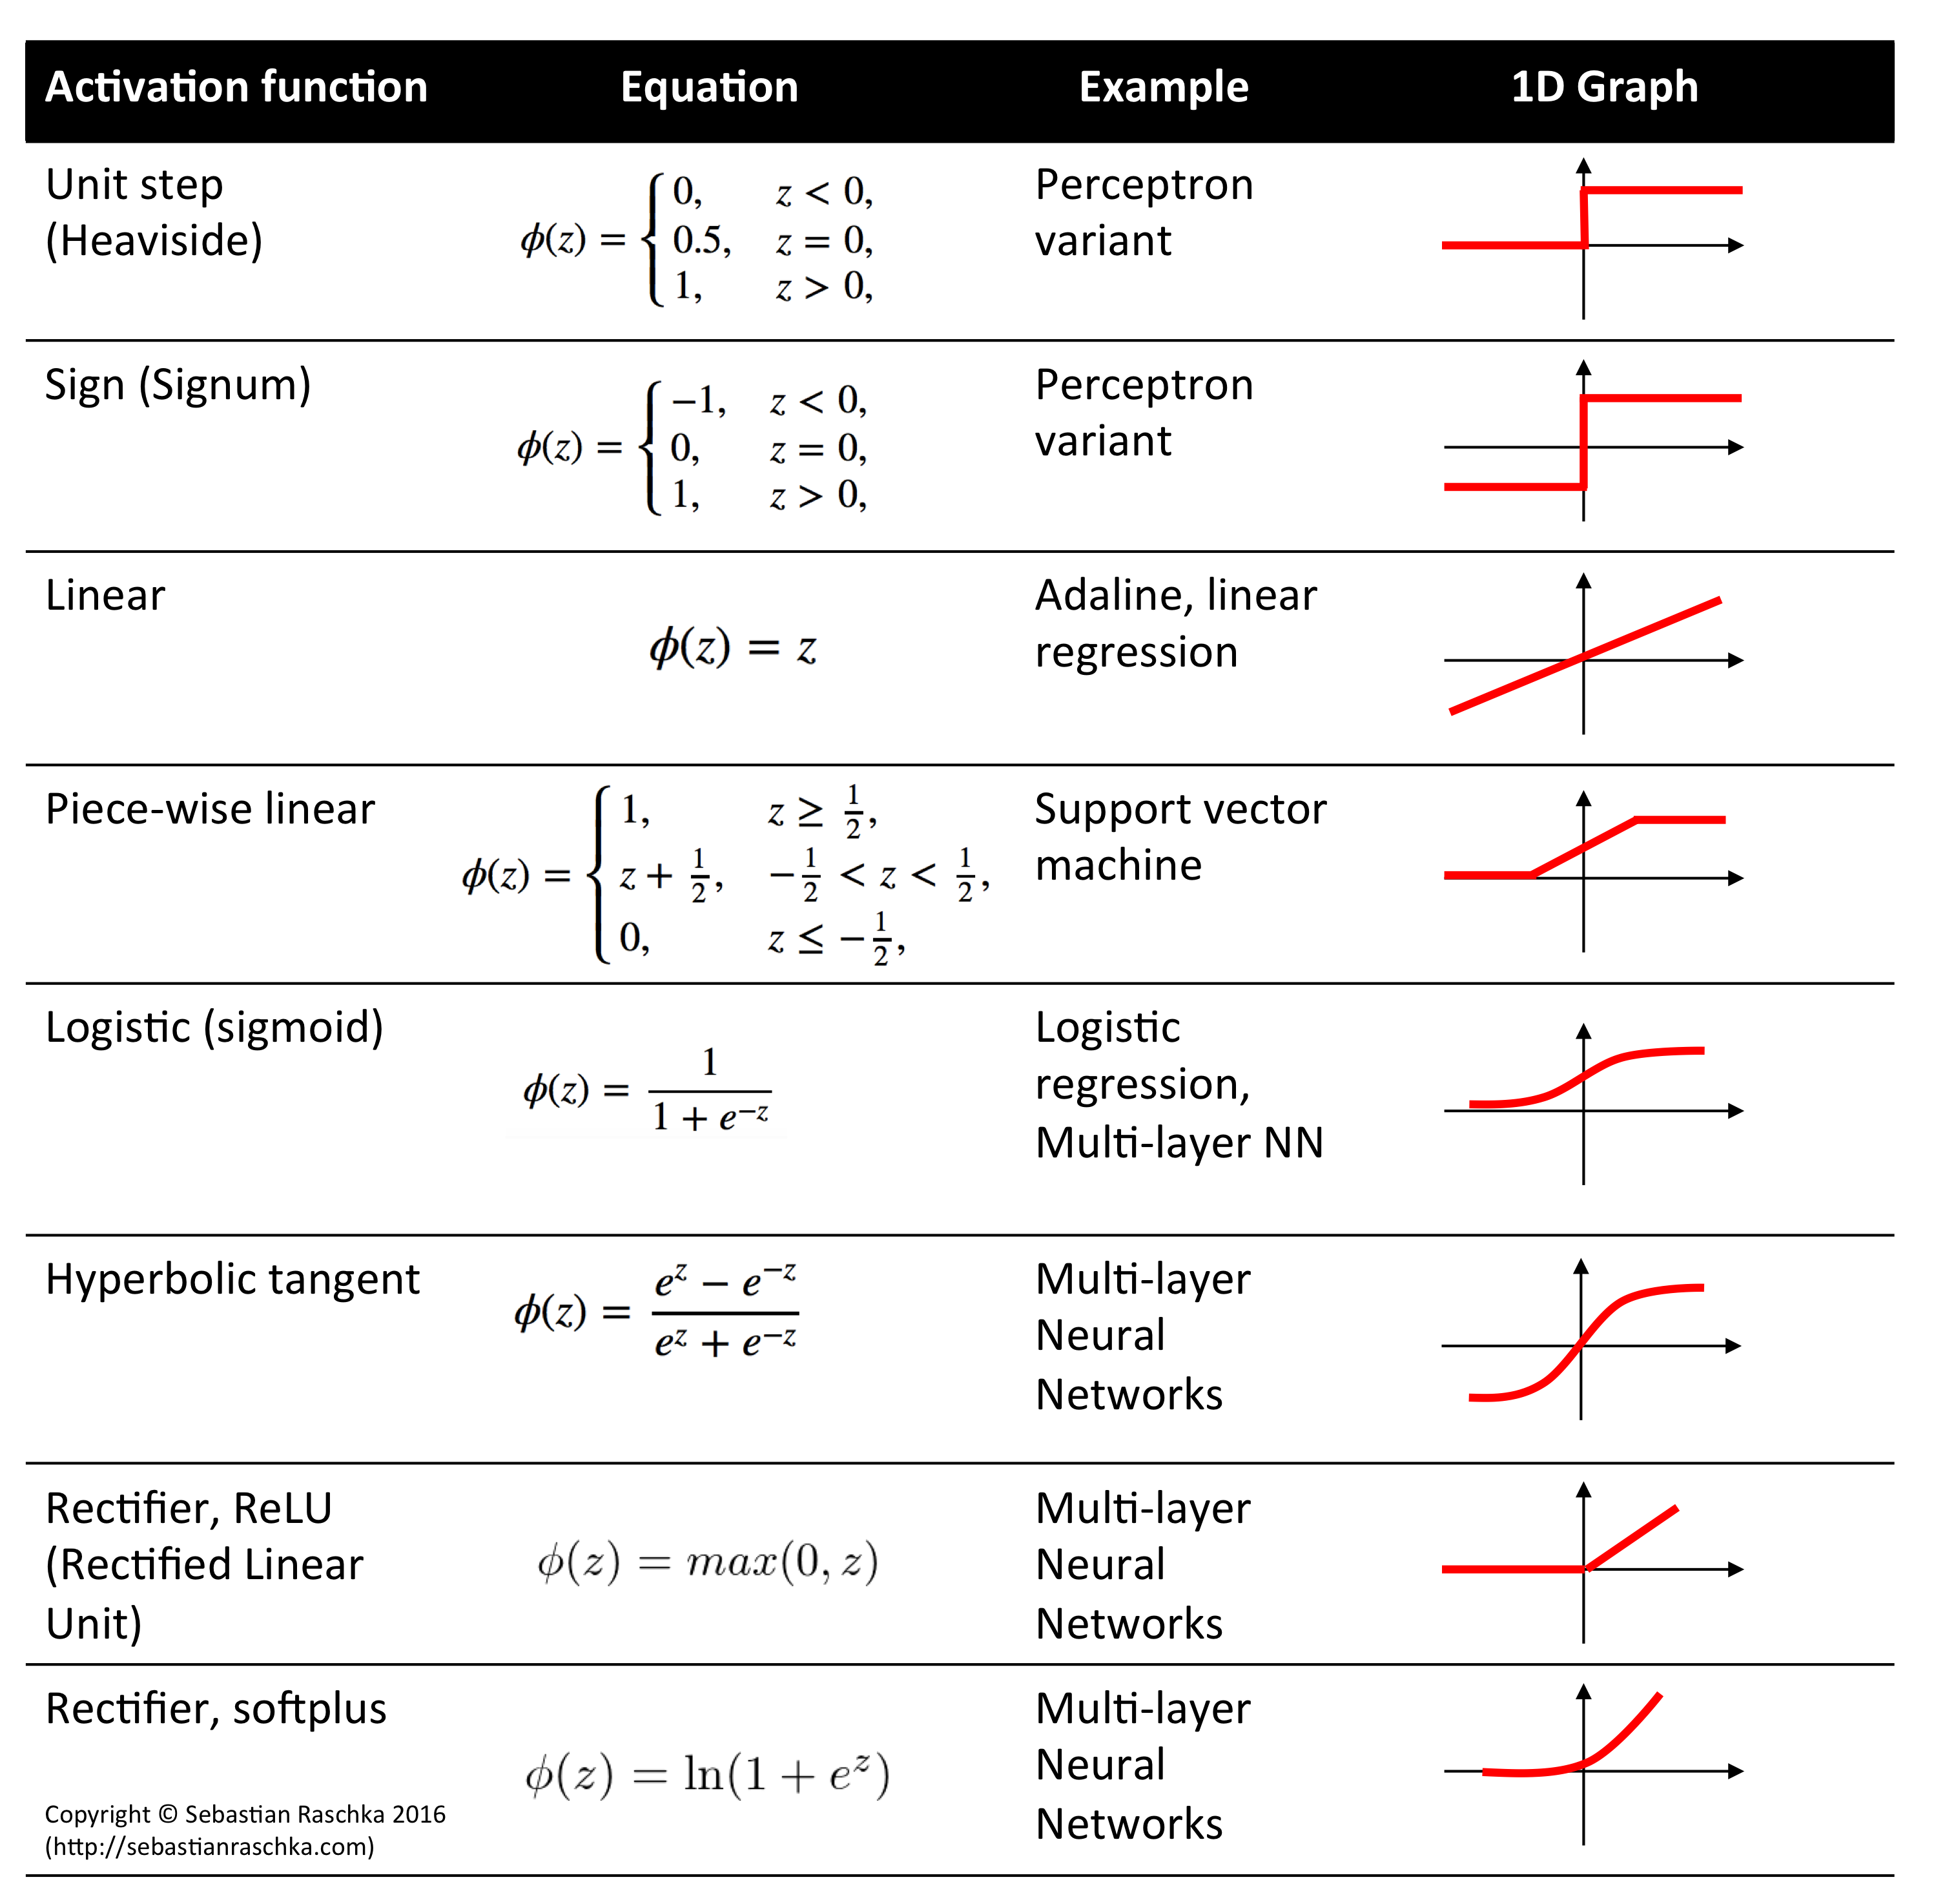

# General structure of a neural network

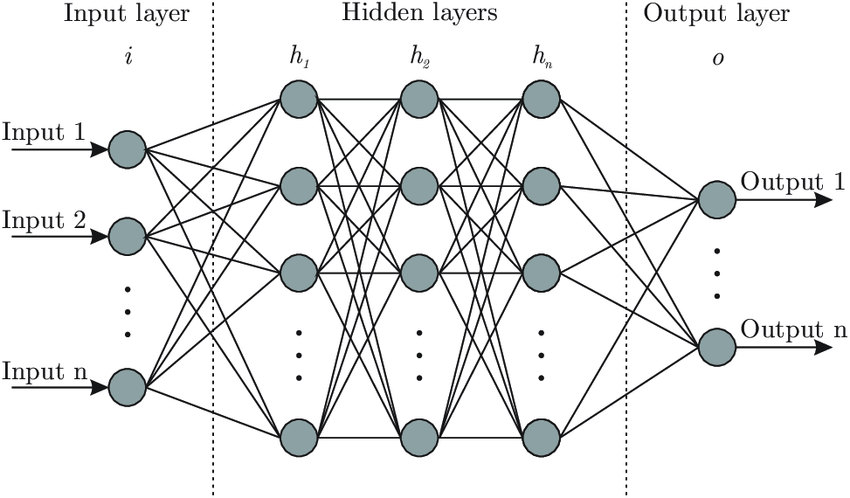

# Forward propagation

**Forward propagation** is the process by which an input **passes through a neural network** to produce an output. Each layer **computes a transformation** on the data and **passes it to the next** layer.

In a simple feedforward network, for an input vector $x$, the computation looks like this:

$$
\begin{align*}
z^{[1]} &= W^{[1]}x + b^{[1]} \\
a^{[1]} &= \sigma(z^{[1]}) \\
z^{[2]} &= W^{[2]}a^{[1]} + b^{[2]} \\
a^{[2]} &= \sigma(z^{[2]}) \\
\vdots \\
\hat{y} &= a^{[L]} \quad \text{(output layer)}
\end{align*}
$$

Where:

* $W^{[i]}$ and $b^{[i]}$: weights and biases of layer $i$
* $z^{[i]}$: pre-activation (linear combination)
* $a^{[i]}$: activation (after applying nonlinear function)
* $\sigma$: activation function (e.g., ReLU, sigmoid)
* $\hat{y}$: final output of the network (prediction)


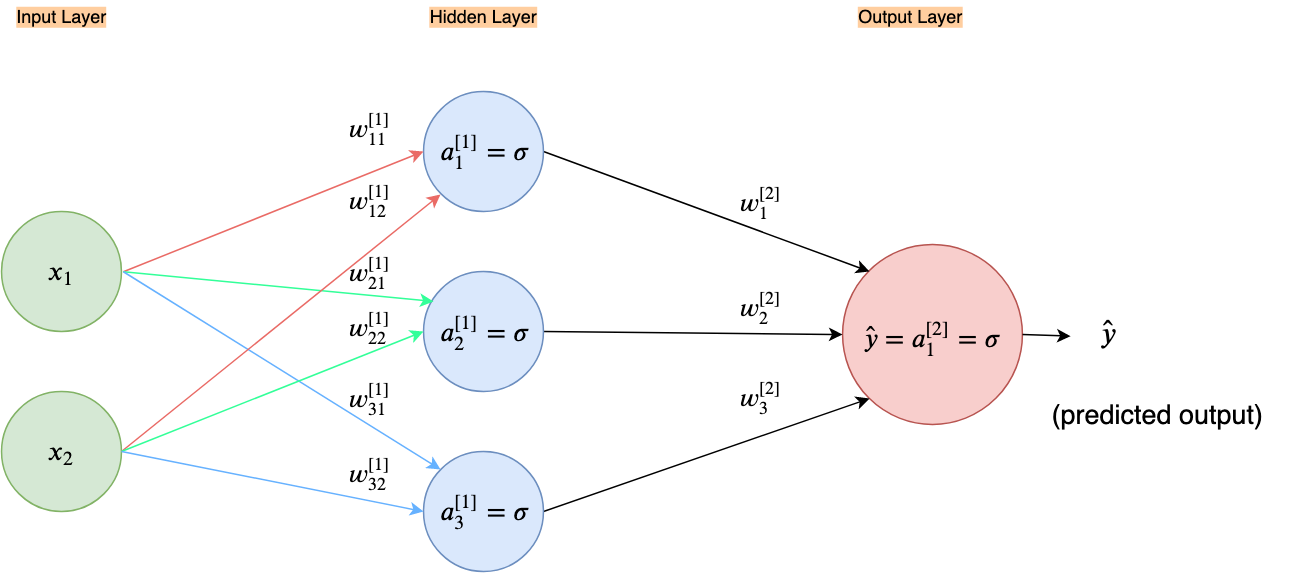


### What is a Computation Graph?

A **computation graph** is a **graph-based representation** of a sequence of operations (e.g., addition, multiplication, nonlinear functions) that make up the forward pass of the neural network.

### Key Concepts:

* **Nodes** represent variables or operations (e.g., $z = W x + b$, $a = \sigma(z)$)
* **Edges** represent data flow between operations
* You can **trace the output step by step**, and during **backpropagation**, you **reverse the graph** to compute gradients

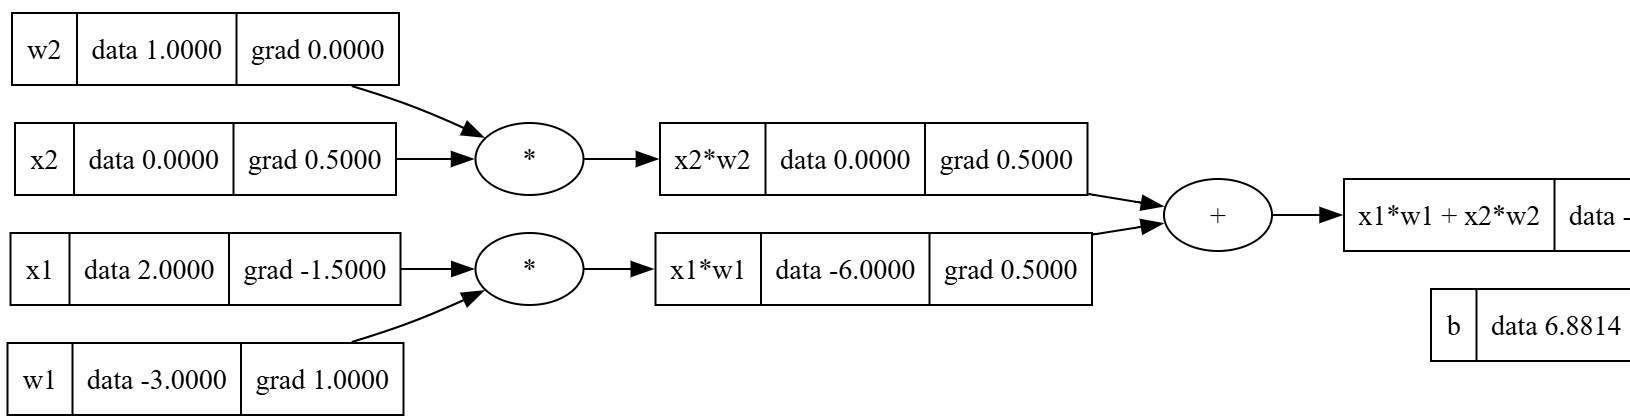

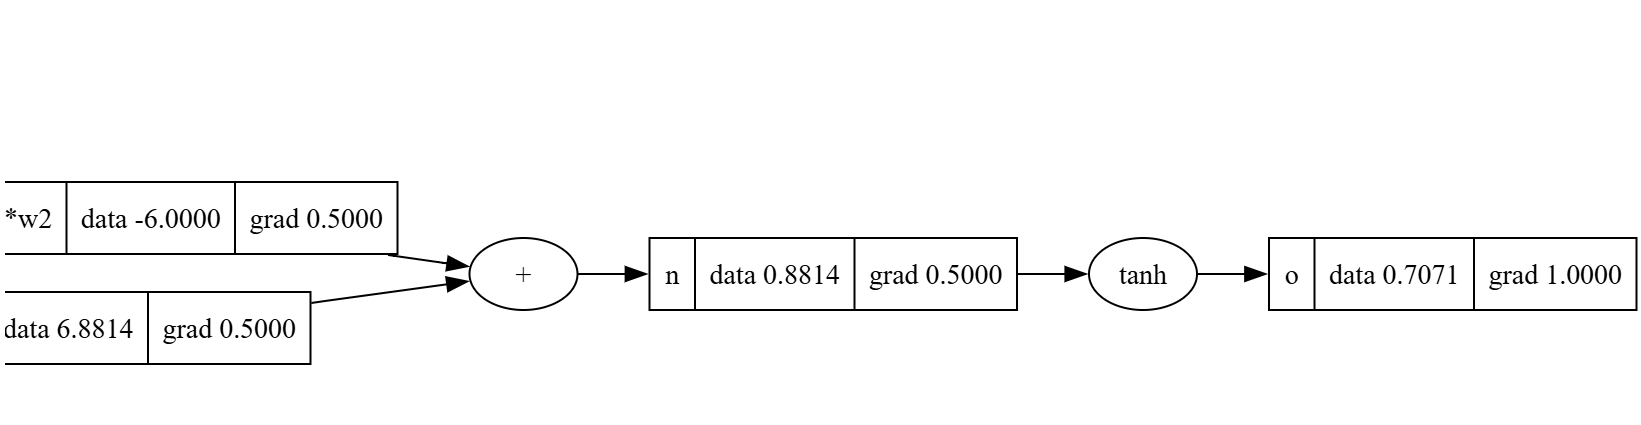


### Why Use a Computation Graph?

* It's a **clear way to model dependencies** between computations
* It allows **automatic differentiation** (e.g., in PyTorch, TensorFlow)
* Essential for **gradient-based optimization**, as it tells us exactly where and how to compute derivatives


Each operation is a node, and arrows indicate the flow of data. During backpropagation, this same graph is used to compute gradients **in reverse order** using the chain rule.

# Backpropagation

**Backpropagation** is the process of computing the **gradient of the loss function** with respect to each parameter in the network using the **chain rule** of calculus. These gradients are then used to **update the weights** via gradient descent to minimize the loss.


Let’s assume a simple neural network with:

* Input $x$
* Weight $W$, bias $b$
* Activation $\sigma$
* Prediction $\hat{y} = \sigma(Wx + b)$
* Loss function $\mathcal{L}(\hat{y}, y)$

We want to compute the gradient of the loss $\mathcal{L}$ with respect to the parameters $W$ and $b$.


### Step-by-Step: Using the Chain Rule

Let:

* $z = Wx + b$
* $a = \sigma(z)$
* $\hat{y} = a$
* $\mathcal{L} = \text{Loss}(\hat{y}, y)$

We want $\frac{\partial \mathcal{L}}{\partial W}$ and $\frac{\partial \mathcal{L}}{\partial b}$.

By the **chain rule**:

$$
\frac{\partial \mathcal{L}}{\partial W} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial W}
$$

More concretely:

* $\frac{\partial \mathcal{L}}{\partial \hat{y}}$: Derivative of the loss w\.r.t. output
* $\frac{\partial \hat{y}}{\partial z} = \sigma'(z)$: Derivative of the activation
* $\frac{\partial z}{\partial W} = x$: Derivative of linear transformation

Then:

$$
\frac{\partial \mathcal{L}}{\partial W} = (\hat{y} - y) \cdot \sigma'(z) \cdot x
$$

This tells us how to **change the weights to reduce the loss**.


### How the Computation Graph helps

The **computation graph** breaks the overall function into **elementary operations**:

* Addition
* Multiplication
* Activation functions
* Loss calculation

Each node represents an operation and **stores the forward value** during forward propagation.

During backpropagation:

* The graph is **traversed backward**
* At each node, we compute the **local derivative**
* We use the **chain rule** to compute the total gradient with respect to each input

This is why deep learning libraries like **PyTorch** and **TensorFlow** build a **dynamic computation graph** during the forward pass and then **automatically compute gradients** during backpropagation using that graph.


### Example: Single Neuron with MSE Loss

Let:

* $\hat{y} = \sigma(Wx + b)$
* $\mathcal{L} = \frac{1}{2}(y - \hat{y})^2$

### Forward pass:

1. $z = Wx + b$
2. $\hat{y} = \sigma(z)$
3. $\mathcal{L} = \frac{1}{2}(y - \hat{y})^2$

### Backward pass:

* $\frac{\partial \mathcal{L}}{\partial \hat{y}} = \hat{y} - y$
* $\frac{\partial \hat{y}}{\partial z} = \sigma'(z)$
* $\frac{\partial z}{\partial W} = x$

Then combine using chain rule:

$$
\frac{\partial \mathcal{L}}{\partial W} = (\hat{y} - y) \cdot \sigma'(z) \cdot x
$$

Same for $b$:

$$
\frac{\partial \mathcal{L}}{\partial b} = (\hat{y} - y) \cdot \sigma'(z)
$$

# Multi Class Classification using Softmax regression

## 1. Problem Setup

We are given a **dataset**:

* $m$ training examples: $\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^m$
* Each input $\mathbf{x}^{(i)} \in \mathbb{R}^n$ (e.g., a flattened image, text embedding, etc.)
* Each label $y^{(i)} \in \{0, 1, \dots, K-1\}$: there are $K$ possible **classes**

To use them in a neural network, labels are **one-hot encoded**:

* Example: if $K = 4$ and the class is 2 → $y^{(i)} = [0, 0, 1, 0]$
  

## 2. Deep Neural Network Architecture

We build a neural network with:

* Input layer of size $n$
* One or more **hidden layers** (e.g., Dense + ReLU)
* Final **output layer** of size $K$ with **softmax activation**

### Forward Pass

For hidden layers:

$$
z^{[l]} = W^{[l]} h^{[l-1]} + b^{[l]}
\quad,\quad
h^{[l]} = \text{ReLU}(z^{[l]})
$$

For the **output layer** (layer $L$):

$$
z^{[L]} = W^{[L]} h^{[L-1]} + b^{[L]}
\quad,\quad
\hat{y} = \text{softmax}(z^{[L]})
$$


### Why Use Softmax? What Does It Do?

#### Purpose of Softmax:

The **softmax function** converts the **raw output scores (logits)** of the final layer into a **probability distribution** over classes.

Given:

$$
\mathbf{z} = [z_1, z_2, ..., z_K]
$$

Softmax outputs:

$$
\hat{y}_k = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}} \quad \text{for } k = 1, \dots, K
$$

#### Properties of Softmax:

* All $\hat{y}_k \in (0, 1)$
* $\sum_k \hat{y}_k = 1$
* Interpretable as **probabilities**
* Makes output suitable for **classification tasks** (choose class with highest probability)

#### Intuition:

* If one $z_k$ is much larger than the others, softmax will assign it a high probability.
* Small differences between $z_k$ are **amplified**, making the network more confident.


## 3. Loss Function (Single Example)

The **categorical cross-entropy loss** for one training example:

$$
\mathcal{L}^{(i)} = -\sum_{k=1}^K y_k^{(i)} \log(\hat{y}_k^{(i)})
$$

* $y_k^{(i)}$: one-hot encoded true label
* $\hat{y}_k^{(i)}$: softmax probability predicted by the model

This penalizes the model for assigning low probability to the correct class.


## 4. Cost Function (Full Dataset or mini-batch)

The **cost function** is the **average loss** over all $m$ training examples:

$$
J(W, b) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}^{(i)} = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat{y}_k^{(i)})
$$

Where:

* $W, b$ are all weights and biases across the network

This is the function we minimize during training.


## 5. Training Process

1. **Initialize** weights $W^{[l]}$, biases $b^{[l]}$
2. For each epoch:

   * Perform **forward pass** to compute $\hat{y}^{(i)}$
   * Compute **cost function**
   * Use **backpropagation** to compute gradients
   * **Update** parameters using gradient descent:

     $$
     W^{[l]} \leftarrow W^{[l]} - \eta \frac{\partial J}{\partial W^{[l]}}, \quad
     b^{[l]} \leftarrow b^{[l]} - \eta \frac{\partial J}{\partial b^{[l]}}
     $$


## 6. Prediction (Inference)

After training:

* Given input $\mathbf{x}$, compute $\hat{y} = \text{softmax}(z^{[L]})$
* Predicted class is:

  $$
  \text{Prediction} = \arg\max_k \hat{y}_k
  $$

This is the class with the highest predicted probability.

### Why do we need softmax at inference time?

At inference time, when we don't use the cost function, **the class with the highest logit value** (i.e., the raw output before softmax) is also the one that will have the **highest softmax probability**. So technically:

$$
\arg\max_k z_k = \arg\max_k \hat{y}_k
$$

This means:

✅ **For class prediction** (e.g., deciding "this is class 3"), you **do not need softmax** — you can just take the `argmax` over the logits.


There are several reasons you **might still use softmax** during inference:

### 1. **To Get Probabilities, Not Just a Class**

* Softmax transforms logits into a **normalized probability distribution** over all classes.
* Useful when:

  * You want to **know how confident** the model is.
  * You need **probabilities** for downstream tasks (e.g., decision thresholds, ranking, calibration, ensembling).
* Example:

  ```python
  # logits: [4.2, 1.1, -3.5]
  softmax: [0.92, 0.07, 0.001]
  ```

### 2. **For Threshold-Based Decisions**

* In some applications (e.g., medical diagnosis), you might only accept predictions **above a confidence threshold**:

  * "Only predict this disease if confidence > 0.9"

### 3. **For Model Interpretability**

* Probabilities help humans **interpret the model's behavior**, especially in sensitive applications.

### 4. **During Evaluation (e.g., Log Loss / Cross-Entropy)**

* If you're computing **log-loss** or any metric based on probability scores (not just accuracy), you need softmax.

So in short:

> **No, you don't need softmax if you're only doing `argmax` for prediction. But you do need it when you care about the actual probabilities.**

# Mini Batch Gradient Descent

**Mini-batch Gradient Descent** is a variant of gradient descent used to train machine learning models, especially neural networks. It balances between two other forms: **batch gradient descent** and **stochastic gradient descent (SGD)**.


### 🔧 Key Idea

Instead of computing the gradient of the loss function using:

* **all training data** (as in **batch** gradient descent), or
* **just one data point** (as in **stochastic** gradient descent),

**mini-batch gradient descent** computes the gradient using a **small random subset (mini-batch)** of the training data.


### ⚖️ Why Use Mini-batches?

* **More stable convergence** than SGD
* **Faster and more memory-efficient** than full batch
* **Parallelization** is easier (can use GPU acceleration)


### How It Works

1. **Split the dataset** into mini-batches (e.g., 32, 64, or 128 samples).
2. For each **mini-batch**:

   * Forward pass → compute predictions
   * Compute the **loss**
   * Backward pass → compute gradients
   * **Update** model parameters using the average gradient of that batch


### Formula

If $\theta$ are the model parameters and $\eta$ is the learning rate:

$$
\theta := \theta - \eta \cdot \frac{1}{m} \sum_{i=1}^{m} \nabla_\theta L(x_i, y_i; \theta)
$$

where:

* $m$ = mini-batch size
* $L$ = loss function
* $(x_i, y_i)$ = data sample and label


### Pros

* Combines the benefits of batch and stochastic gradient descent
* Allows efficient use of hardware (especially GPUs)
* Smooths out noisy updates (unlike SGD)

### Cons

* Requires tuning mini-batch size
* Still may get stuck in local minima or saddle points

# Exponentially weighted average

**Exponentially Weighted Averages (EWA)** — also known as **exponential moving averages (EMA)** — are a technique for computing a smoothed average over time where **recent values are weighted more heavily** than older ones. This is widely used in optimization (like in **momentum**, **RMSProp**, **Adam**) and time series forecasting.


### Intuition

Instead of averaging all past values equally (like in a simple moving average), EWA gives **exponentially decreasing weights** to older observations. This makes it:

* **More responsive** to recent changes
* **Less sensitive** to outliers or old values

Think of it as a memory that **fades over time**.


### Formula

Let:

* $x_t$ = current value (e.g., gradient at step $t$)
* $v_t$ = exponentially weighted average
* $\beta \in [0,1)$ = smoothing factor (controls the decay rate)

Then:

$$
v_t = \beta v_{t-1} + (1 - \beta) x_t
$$


### **Weights of Each Value**

We can **unroll** the recursion to understand the weights:

$$
v_t = (1 - \beta) x_t + \beta(1 - \beta) x_{t-1} + \beta^2(1 - \beta) x_{t-2} + \cdots + \beta^{t-1}(1 - \beta) x_1 + \beta^t v_0
$$

Each $x_k$ is weighted by:

$$
w_k = (1 - \beta) \cdot \beta^{t - k}
$$

So:

* The **most recent value** $x_t$: weight = $1 - \beta$
* The **value before that** $x_{t-1}$: weight = $(1 - \beta)\beta$
* And so on...

### Properties:

* The weights **decay exponentially** as values get older.
* All weights **sum to approximately 1**, especially as $t \to \infty$.


### **Choosing the Smoothing Factor $\beta$**

### $\beta \in (0, 1)$

* **Large $\beta$ (e.g. 0.9, 0.99, 0.999):**

  * Long memory (slower to react to new data).
  * Good for **smoothing** noisy signals.
  * Used in **Adam** optimizer: $\beta_1 = 0.9$, $\beta_2 = 0.999$

* **Small $\beta$ (e.g. 0.1, 0.3):**

  * Reacts quickly to changes.
  * Weights recent data more heavily.


### Interpretation via "effective window size":

The **effective number of steps** that contribute significantly to the average is about:

$$
N_{\text{eff}} = \frac{1}{1 - \beta}
$$

Examples:

| $\beta$ | Effective Window |
| ------- | ---------------- |
| 0.5     | \~2              |
| 0.9     | \~10             |
| 0.99    | \~100            |
| 0.999   | \~1000           |

So a $\beta = 0.9$ keeps a "memory" of roughly the last 10 values.


### Bias Correction

Early on (when $t$ is small), $v_t$ is biased toward zero because there hasn’t been enough data. To fix this, we use:

$$
\hat{v}_t = \frac{v_t}{1 - \beta^t}
$$

This is especially important in optimizers like **Adam**.

# Gradient Descent with momentum

**Gradient Descent with Momentum** is an optimization technique that improves the standard gradient descent algorithm by adding a concept borrowed from physics: **momentum**. This helps accelerate learning, especially in scenarios with **noisy gradients**, **ravines**, or **flat regions** in the loss surface.


### Intuition

In standard gradient descent, each update is based solely on the current gradient. In contrast, **momentum** incorporates past gradients to smooth out the update direction — similar to how an object in motion keeps moving in the same direction unless acted upon.

Think of it like a ball rolling down a hill: it builds up **momentum**, helping it roll through small bumps (local minima) and accelerate in valleys (directions with consistent gradients).


### How It Works

Instead of updating parameters purely based on the current gradient:

1. Maintain a **velocity vector** $v$, which is an exponentially decaying average of past gradients.
2. Update parameters using this velocity.


### Formula

Let:

* $\theta$ be the model parameters
* $\eta$ be the learning rate
* $\gamma \in [0, 1)$ be the **momentum coefficient** (e.g., 0.9)
* $\nabla_\theta L$ be the current gradient of the loss

Then the update rules are:

$$
v_t = \gamma v_{t-1} + \eta \nabla_\theta L(\theta_t)
$$

$$
\theta_{t+1} = \theta_t - v_t
$$


### Benefits

* **Faster convergence** on curved surfaces (like ravines)
* **Smoother updates** (less oscillation)
* Helps escape **local minima**
* More robust to **noisy gradients**


### Example Scenario

In deep learning, momentum helps especially in **loss surfaces with long, narrow valleys**. Without momentum, gradient descent might "zigzag" down the sides of the valley. With momentum, it builds up speed in the right direction and moves more efficiently.


### Choosing the momentum

Choosing the **momentum parameter** in **SGD with momentum** is important because it directly affects how gradients are **smoothed** and how fast your model **converges**. Let's walk through what momentum does, how it's used, and how to choose a good value.

Momentum helps SGD **accelerate in the relevant direction** and **dampen oscillations**. It does this by accumulating an exponentially decaying moving average of past gradients.

#### Typical values:

| Task type                                  | Momentum ($\mu$)      |
| ------------------------------------------ | --------------------- |
| Standard deep learning (e.g. MNIST, CIFAR) | **0.9** (most common) |
| Very noisy gradients or smaller networks   | 0.7 – 0.9             |
| Large networks with smooth gradients       | 0.95 – 0.99           |

> **Rule of thumb**: Start with **0.9**, and adjust only if:
>
> * The updates are unstable or oscillate: **lower** $\mu$
> * Convergence is too slow or gradients vanish: **raise** $\mu$

#### Interaction with Learning Rate

* If **momentum is high** (e.g. 0.99), use a **lower learning rate**.
* If **learning rate is high**, use **lower momentum** to avoid overshooting.

Momentum **amplifies the step size**, so improper combinations can cause instability.

#### Common Pitfalls

* **Too high momentum (e.g. > 0.99)**: Can lead to overshooting or instability.
* **Too low momentum (e.g. < 0.5)**: Makes momentum ineffective — behaves like regular SGD.
* Don’t change momentum dynamically during training unless you're experimenting.

# RMSProp

**RMSProp (Root Mean Square Propagation)** is an adaptive learning rate optimization algorithm commonly used to train neural networks. It was introduced by Geoff Hinton in his Coursera lecture series and is designed to overcome problems with the learning rate in traditional gradient descent, especially in **non-stationary and noisy environments**.


### Intuition

Standard gradient descent uses a single learning rate for all parameters, which can lead to issues when:

* The loss surface has **ravines** (steep in one direction, flat in another).
* The gradients vary significantly across dimensions.

**RMSProp adapts the learning rate individually for each parameter**, scaling it based on a **moving average of the squared gradients**. This helps stabilize and speed up convergence, especially in deep learning.


### How RMSProp Works

1. Maintain a moving average of the **squared gradients** for each parameter.
2. Divide the current gradient by the **square root of this average** to normalize its magnitude.
3. Update the parameters using the scaled gradient.


### Formula

Let:

* $\theta$ be the parameters
* $g_t = \nabla_\theta L(\theta_t)$ be the gradient at time $t$
* $E[g^2]_t$ be the exponentially decaying average of squared gradients
* $\eta$ be the learning rate
* $\gamma \in [0, 1)$ be the decay rate (commonly 0.9)
* $\epsilon$ be a small constant to avoid division by zero (e.g., $10^{-8}$)

Then:

$$
E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g_t^2
$$

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t} + \epsilon} \cdot g_t
$$


### Benefits

* Automatically **adapts the learning rate** per parameter
* Helps avoid issues with **exploding or vanishing gradients**
* **Stabilizes training** and speeds up convergence
* Works well for **recurrent neural networks (RNNs)** and deep models


### Limitations

* Introduces hyperparameters like $\gamma$ and $\epsilon$ that need tuning
* May not perform well on sparse gradients (unlike AdaGrad)

# Adam method for gradient descent

**Adam (Adaptive Moment Estimation)** is one of the most popular and effective gradient descent optimization algorithms in deep learning. It combines ideas from both **Momentum** and **RMSProp** to provide a robust, adaptive, and fast-converging optimizer.


### Intuition

Adam maintains:

1. An exponentially decaying **average of past gradients** (like **momentum**) — to capture direction.
2. An exponentially decaying **average of past squared gradients** (like **RMSProp**) — to scale learning rates per parameter.

It also includes a **bias correction** step, which ensures that the moving averages are unbiased during early iterations.


### How Adam Works

Let:

* $g_t = \nabla_\theta L(\theta_t)$: gradient at step $t$
* $m_t$: first moment estimate (mean of gradients)
* $v_t$: second moment estimate (uncentered variance)
* $\beta_1, \beta_2$: decay rates for $m$ and $v$ (default: 0.9 and 0.999)
* $\hat{m}_t, \hat{v}_t$: bias-corrected versions of $m_t$ and $v_t$
* $\eta$: learning rate (default: 0.001)
* $\epsilon$: small constant to prevent division by zero (e.g., $10^{-8}$)


### Algorithm

1. **Initialize**: $m_0 = 0, v_0 = 0, t = 0$
2. For each step $t$:

   * $t = t + 1$
   * Compute gradient: $g_t$
   * Update biased moments:

     * $m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$
     * $v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$
   * Correct bias:

     * $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$
     * $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$
   * Update parameters:

     $$
     \theta_{t+1} = \theta_t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
     $$


### Advantages

* **Fast convergence** — especially for deep neural networks
* **Adaptive learning rates** — handles sparse or noisy gradients well
* **Little tuning required** — default parameters work well in many cases
* Works well in **non-stationary environments** (e.g., RL or online learning)


### Disadvantages

* Can sometimes lead to **non-converging or poor generalization** if improperly used
* May require **learning rate decay** for long training runs
* Uses more memory than SGD due to extra parameters

# Batch Normalization

**Batch Normalization (Batch Norm)** is a technique used during training of deep neural networks to make the optimization process faster and more stable. It works by **normalizing the inputs to each layer** so that they have a consistent distribution, which helps mitigate issues like **internal covariate shift**.


### Internal Covariate Shift

**Internal Covariate Shift** refers to the phenomenon where the **distribution of activations** (inputs to a layer) **changes during training**, as the parameters of the previous layers are updated. This constant shift makes it harder for the network to learn, because each layer must continuously adapt to the new distribution of its inputs.


### Analogy

Imagine you're trying to learn a task, but the rules of the game keep changing every few minutes — that's what each layer in a deep network experiences if internal covariate shift is present.


### What Causes It?

* As we train a deep neural network, parameters in each layer change.
* This affects the output distribution of that layer — which becomes the **input** to the next layer.
* The deeper the network, the more pronounced the shift.
* This **slows down training** and makes optimization harder.


### Example

Suppose a layer originally receives inputs centered around 0 with small variance.
After some training steps, it starts receiving inputs with a larger mean and variance.

Now:

* The following layer has to re-learn how to handle this new input distribution.
* Gradients can become unstable (especially with saturating activations like sigmoid or tanh).


### How Batch Normalization Helps

**Batch Normalization** was introduced to reduce internal covariate shift by **normalizing the inputs** to each layer:

* Keeps the distribution of inputs **more stable** during training.
* Allows for **faster and more stable convergence**.
* Helps use **higher learning rates**, making training more efficient.


### Note: Modern Perspective

Although internal covariate shift is how BatchNorm was originally justified, **some researchers argue** that the success of BatchNorm comes more from:

* **Smoother optimization landscapes**
* **Gradient flow regularization**
  than from directly reducing internal covariate shift.

Still, it's a useful conceptual model to understand why stabilizing activations can help.


### Intuition

As training progresses, the distribution of activations in a deep network can shift, making it harder for the network to learn. Batch Norm helps by:

* **Normalizing** the inputs to a layer (mean 0, variance 1)
* **Learning scale and shift** parameters so the network can still represent the identity function if needed

This leads to:

* Faster convergence
* Reduced sensitivity to initialization
* Improved generalization


### How Batch Norm Works

Given a mini-batch of inputs $x_1, x_2, ..., x_m$, Batch Norm performs:

1. **Compute batch statistics**:

   $$
   \mu_B = \frac{1}{m} \sum_{i=1}^{m} x_i \quad \text{(mean)}
   $$

   $$
   \sigma_B^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2 \quad \text{(variance)}
   $$

2. **Normalize the batch**:

   $$
   \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
   $$

3. **Scale and shift (learnable parameters)**:

   $$
   y_i = \gamma \hat{x}_i + \beta
   $$

Where:

* $\gamma$ (scale) and $\beta$ (shift) are learned during training
* $\epsilon$ is a small constant for numerical stability


### When and Where to Use It

* Usually applied **after linear or convolutional layers**, and **before non-linearities** like ReLU.
* Can be used in fully connected networks, CNNs, and sometimes RNNs.


### Benefits

* **Faster training** due to smoother gradients
* **Less sensitivity** to weight initialization
* Can act as a form of **regularization** (like dropout)
* Helps avoid **vanishing/exploding gradients**


### Limitations

* Behavior changes between **training** and **inference**:

  * During training: uses batch statistics
  * During inference: uses running estimates (moving averages) of mean and variance
* Doesn’t work well with **very small batch sizes**
* Adds complexity to the model


At **inference (test) time**, **Batch Normalization** must be handled differently than during training to ensure consistency and correctness of the model’s predictions.


### Why the Difference?

During **training**, BatchNorm normalizes activations using **batch statistics** (mean and variance of the current mini-batch).
However, at **test time**, we:

* **Don’t have a batch** (or the batch might be of size 1).
* Need the model to be **deterministic and consistent**.

So instead, we use **running estimates** of the mean and variance that were accumulated during training.


### Step-by-Step: How BatchNorm Works at Inference

#### **During Training**

For each BatchNorm layer, we maintain:

* **Running mean** $\mu_{\text{running}}$
* **Running variance** $\sigma_{\text{running}}^2$

At each training step, we update them as an exponential moving average:

$$
\mu_{\text{running}} \leftarrow \alpha \mu_{\text{running}} + (1 - \alpha) \mu_B
$$

$$
\sigma_{\text{running}}^2 \leftarrow \alpha \sigma_{\text{running}}^2 + (1 - \alpha) \sigma_B^2
$$

Where:

* $\mu_B$, $\sigma_B^2$ are the **batch** mean and variance
* $\alpha$ is the **momentum** hyperparameter (e.g., 0.9 or 0.99)

These running estimates are **not learned**, but updated during training.


#### **During Inference**

Instead of computing statistics from the current input, we use the **saved running estimates**:

$$
\hat{x} = \frac{x - \mu_{\text{running}}}{\sqrt{\sigma_{\text{running}}^2 + \epsilon}}
$$

$$
y = \gamma \hat{x} + \beta
$$

* No batch statistics are used
* $\gamma$ and $\beta$ are the same learned parameters from training
* Ensures that test-time outputs are **consistent and deterministic**


### Summary: Training vs Inference

| Step                 | Training                      | Inference (Test Time)               |
| -------------------- | ----------------------------- | ----------------------------------- |
| Mean/Variance        | Computed per mini-batch       | Use running estimates from training |
| Behavior             | Stochastic (depends on batch) | Deterministic                       |
| Update running stats | Yes                           | No                                  |


### Important Notes

* **In PyTorch**: `model.train()` enables batch stats; `model.eval()` switches to using running stats.
* **In TensorFlow/Keras**: handled internally with training flag `training=False`.
* Poor running stat estimation (e.g., due to small batch sizes or short training) can lead to bad test-time performance.

# The vanishing gradient problem

The **vanishing gradient problem** is a critical issue that affects the training of deep neural networks — especially those with many layers. It refers to the **gradients becoming very small** (i.e., close to zero) as they are **backpropagated** through the network, causing earlier layers (closer to input) to learn **very slowly or not at all**.


During training, a neural network learns by minimizing a **loss function**. To do this, it computes the **gradient of the loss** with respect to each weight using a method called **backpropagation**, which applies the **chain rule**:

$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial a_n} \cdot \frac{\partial a_n}{\partial a_{n-1}} \cdot \dots \cdot \frac{\partial a_2}{\partial a_1} \cdot \frac{\partial a_1}{\partial w}
$$

Here, $a_i$ is the activation at layer $i$, and the gradient is passed back through every layer.


### Where the Problem Comes From

Each term in that product involves **derivatives of activation functions**. If those derivatives are small (as they are for sigmoid or tanh in saturated regions), then:

* The **product of many small numbers** becomes **exponentially smaller**.
* As a result, the gradient **shrinks rapidly** as it moves backward through the layers.
* Early layers end up receiving **almost no gradient**, so their weights **barely change**.
* The network **fails to learn useful features in early layers**.


### Activation Functions That Cause It

#### Sigmoid:

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \quad \text{has} \quad \sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

* Derivative maxes out at **0.25**, but quickly drops toward **0** as $x \to \pm \infty$

#### Tanh:

$$
\tanh'(x) = 1 - \tanh^2(x)
$$

* Derivative is **close to 0** for large $|x|$

So, in deep networks, multiplying these small derivatives over many layers leads to gradients that vanish — hence the name.


### Consequences of Vanishing Gradients

* **Slow training**: Layers close to the input update very slowly.
* **Poor accuracy**: The network fails to learn complex hierarchical representations.
* **Overfitting to later layers**: Since early layers don’t learn, deeper layers may overfit.


### Solutions to Vanishing Gradients

#### 1. **Use Better Activation Functions**

* **ReLU** (Rectified Linear Unit): Its derivative is 1 (or 0), so doesn’t shrink the gradient.
* **Leaky ReLU, ELU**: Variants designed to address ReLU’s own issues while keeping gradients alive.

#### 2. **Weight Initialization**

* **Xavier (Glorot) Initialization** for tanh
* **He Initialization** for ReLU
  Helps maintain the variance of activations and gradients across layers.

#### 3. **Batch Normalization**

* Normalizes inputs to each layer so that they don’t enter saturation zones of the activation functions.
* Helps gradients flow more consistently.

#### 4. **Residual Connections** (ResNets)

* Skip connections help gradients bypass multiple layers and improve training.

# Normalizing inputs

**Input normalization** is a critical preprocessing step when training neural networks. It ensures that all input features are on similar scales, which helps the network learn faster and more reliably.


### Why Normalize Inputs?

1. **Stabilizes training**: Prevents the gradients from becoming too small or too large (which could lead to vanishing or exploding gradients).
2. **Faster convergence**: Well-scaled inputs allow the optimization algorithm to make more consistent updates.
3. **Improves generalization**: Reduces overfitting and ensures that the model can handle unseen data better.
4. **Ensures fair treatment of features**: Features with larger scales won’t dominate the learning process.


### Common Normalization Methods

#### 1. **Min-Max Scaling (Rescaling to \[0, 1])**

Formula:

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

* Brings values into the range \[0, 1].
* Sensitive to outliers.
* Common for image data (e.g., pixel intensities scaled to \[0,1]).


#### 2. **Z-score Normalization (Standardization)**

Formula:

$$
x' = \frac{x - \mu}{\sigma}
$$

* Centers data around 0 with unit variance.
* Less sensitive to outliers than min-max.
* **Most common method for deep learning**.


#### 3. **Robust Scaling**

Uses median and IQR (interquartile range), good for data with outliers.

$$
x' = \frac{x - \text{median}}{\text{IQR}}
$$


### For Images

Images are typically normalized by dividing pixel values by 255:


Or, with mean and standard deviation (e.g., for ImageNet-trained models):


### When to Apply?

* **Before training**: Fit the scaler on the training set.
* **During inference**: Use the same parameters (mean, std) to transform validation and test sets.


### Tips

* **Don’t fit the scaler on test data!**
* **Use batch normalization** layers in neural networks as an additional normalization method during training.

# Weight initialization

**Weight initialization** in deep neural networks is the process of setting the initial values of the model’s parameters (weights) before training begins. While it might seem trivial, **bad initialization can seriously hinder learning** — causing vanishing or exploding gradients, slow convergence, or getting stuck in poor local minima.


### Why is Weight Initialization Important?

1. **Speeds up convergence** during training.
2. **Avoids symmetry**: If all weights are initialized the same, neurons learn the same features.
3. **Keeps signal variance stable** across layers to avoid vanishing/exploding gradients.


### Common Initialization Strategies

#### 1. **Zero Initialization** ❌ (Bad Idea)

* All neurons start the same → no learning happens (symmetry problem).
* Never use this for weights.


#### 2. **Random Initialization**

* Adds some asymmetry, but poorly scaled values may cause gradients to vanish/explode.

#### 3. **Xavier Initialization (Glorot)**

**Best for sigmoid/tanh activations**

Keeps the variance of activations constant across layers:

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{in} + n_{out}}\right) \quad \text{(Normal)} \\
\text{or} \quad W \sim \mathcal{U}\left[-\sqrt{\frac{6}{n_{in} + n_{out}}}, \sqrt{\frac{6}{n_{in} + n_{out}}}\right] \quad \text{(Uniform)}
$$

#### 4. **He Initialization (Kaiming)**

**Best for ReLU activations**

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{in}}\right)
$$

This helps maintain signal variance when using ReLU, which drops negative outputs.


#### 5. **LeCun Initialization**

Used with self-normalizing networks (e.g., SELU activation):

$$
W \sim \mathcal{N}\left(0, \frac{1}{n_{in}}\right)
$$


### Tips

* Match the initializer to the **activation function**.
* Always initialize **biases to 0** (or small values).
* Frameworks like PyTorch and TensorFlow often initialize weights smartly by default.

# Hyperparameters of a neural network

**Hyperparameters** in a neural network are settings or configurations that are **not learned from the data** during training, but instead must be **set manually before the training begins**. These values significantly affect the training process, model performance, and convergence behavior.


### Common Hyperparameters in Neural Networks:

1. **Learning Rate (α)**

   * Controls the step size during gradient descent updates.
   * Too high: may overshoot the minimum.
   * Too low: slow training or stuck in local minima.

2. **Number of Epochs**

   * Number of times the model sees the entire training dataset.
   * More epochs allow better learning, but can cause overfitting if too many.

3. **Batch Size**

   * Number of samples processed before updating weights.
   * Smaller batches make training noisier but more regularized.
   * Larger batches are more stable but require more memory.

4. **Number of Layers** (Depth of the network)

   * Controls model capacity and complexity.
   * Too shallow: underfitting; too deep: overfitting or vanishing gradients.

5. **Number of Neurons per Layer** (Width)

   * More neurons can model more complex functions.

6. **Activation Functions**

   * e.g., ReLU, Sigmoid, Tanh.
   * Affects non-linearity and gradient flow.

7. **Weight Initialization Method**

   * e.g., Xavier, He initialization.
   * Impacts convergence speed and stability.

8. **Optimizer Type**

   * e.g., SGD, Adam, RMSprop.
   * Determines how weights are updated using gradients.

9. **Dropout Rate**

   * Fraction of neurons randomly ignored during training to prevent overfitting.

10. **Regularization Parameters**

    * L1/L2 weight penalties to reduce overfitting.

### Why Hyperparameters Matter:

* They **control the learning process** and the **model's capacity to generalize**.
* Choosing good hyperparameters is often done via:

  * Manual tuning
  * Grid search / Random search
  * Bayesian optimization
  * Hyperparameter tuning libraries like Optuna or Ray Tune

# Overfitting in neural networks

Let’s now get a sense of how varying the hidden layer size affects the result.

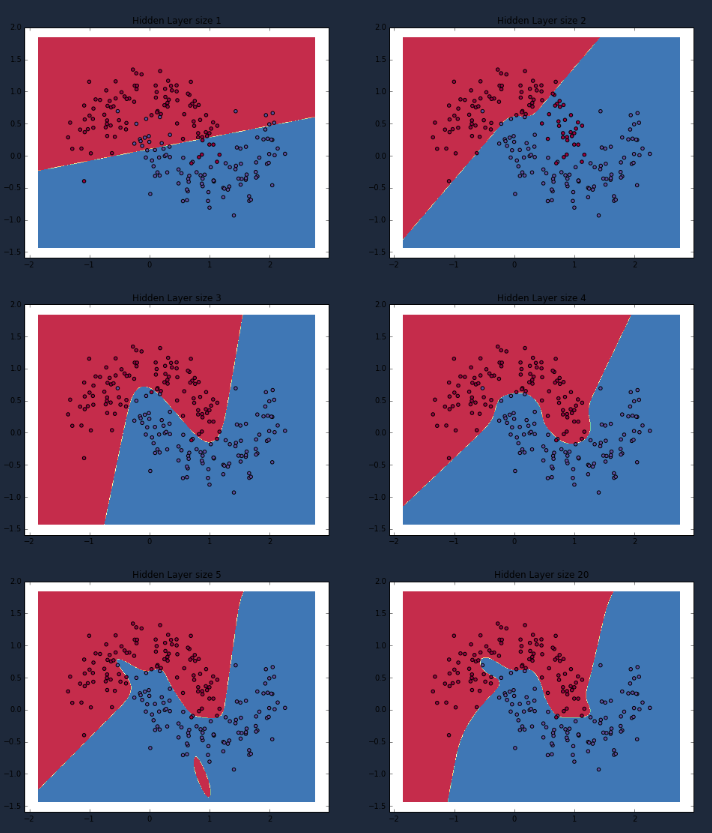

We can see that a hidden layer of low dimensionality nicely captures the general trend of our data. Higher dimensionalities are prone to overfitting. They are “memorizing” the data as opposed to fitting the general shape. If we were to evaluate our model on a separate test set (and you should!) the model with a smaller hidden layer size would likely perform better due to better generalization. We could counteract overfitting with stronger regularization, but picking the a correct size for hidden layer is a much more economical solution.

# Train, Dev, Test sets for training a neural network

When training a neural network (or any machine learning model), the data is typically split into three separate sets: **train**, **dev** (also called **validation**), and **test**. Each has a specific purpose in evaluating and improving the model's performance while avoiding overfitting or underfitting.


### 1. **Training Set (Train)**

* **Purpose:** Used to train the model (i.e., to adjust weights via backpropagation).
* The model sees this data directly and learns from it.
* Typically comprises **60–80%** of the available data.


### 2. **Validation Set (Dev)**

* **Purpose:** Used to evaluate the model during training.
* Helps to tune **hyperparameters** like learning rate, number of layers, etc.
* It is **not used to update the model’s weights**.
* Guides **early stopping**: we stop training when dev performance no longer improves.
* Helps detect **overfitting** — if training accuracy increases but validation accuracy decreases.


### 3. **Test Set**

* **Purpose:** Used only once, **after training is complete**, to assess final model performance.
* It represents **unseen data**, simulating real-world generalization.
* Should never influence training or hyperparameter tuning.


### Example:

Suppose you have 100,000 data samples:

* **Train:** 70,000 samples
* **Validation (Dev):** 15,000 samples
* **Test:** 15,000 samples

This setup helps ensure that the model:

* Learns well on the training data,
* Performs well on slightly different data (validation),
* And generalizes to completely unseen data (test).



The **percentage of data to allocate to training, validation, and test sets** depends on several factors such as:


### 1. **Size of the Dataset**

#### 🔹 Small Dataset (e.g., <10,000 examples)

* You need to conserve data for training.
* Use **k-fold cross-validation** to make the most of limited data.
* A typical split might be:

  * **Train:** 70–80%
  * **Validation:** 10–15%
  * **Test:** 10–15%

#### Medium Dataset (e.g., 10,000–100,000 examples)

* You can afford clearer separation:

  * **Train:** 70–80%
  * **Validation:** 10–15%
  * **Test:** 10–15%

#### Large Dataset (e.g., >100,000 examples)

* Smaller proportions can still be sufficient:

  * **Train:** 90%
  * **Validation:** 5%
  * **Test:** 5%
* Even a few thousand examples for validation/test can yield statistically reliable performance estimates.


### 2. **Goal of the Model**

* **Exploratory model development:** You may use a larger validation set for more frequent tuning.
* **Final model evaluation:** A larger test set helps ensure confidence in generalization.


### 🛠️ 3. **Use Case**

| Use Case                   | Suggested Split                         | Rationale                               |
| -------------------------- | --------------------------------------- | --------------------------------------- |
| Academic experiments       | 70/15/15 or 60/20/20                    | Fair benchmarking, repeated runs        |
| Industrial deployment      | 90/5/5 or 80/10/10                      | Maximize learning, ensure reliability   |
| Time-series forecasting    | Use **chronological split**, not random | Test on future data, not past           |
| Highly imbalanced datasets | Consider **stratified sampling**        | Maintain class distribution across sets |


### 4. **Cross-validation Alternative**

* **When dev/test sizes are hard to set** or data is very limited:

  * Use **k-fold cross-validation** to rotate through train/dev/test roles.
  * Useful for reliable model evaluation, though computationally more expensive.

---

### ✅ Best Practices

* Always keep the **test set completely untouched** during training and hyperparameter tuning.
* If you find yourself tweaking the model based on test results, it's safer to split off another hold-out set.

**K-fold cross-validation** is a powerful technique used in machine learning to evaluate the performance of a model in a more reliable and robust way, especially when you have limited data.

Instead of using a fixed train/test split, **K-fold cross-validation** divides the dataset into `K` equal (or nearly equal) parts, or **"folds"**.

### **How It Works**

Let’s say `K = 5`:

1. **Split** the data into 5 folds (parts).
2. **Iteration 1:** Use fold 1 as the **validation set**, and folds 2–5 as the **training set**.
3. **Iteration 2:** Use fold 2 as the validation set, and folds 1, 3, 4, 5 as training.
4. …
5. **Iteration 5:** Use fold 5 as validation, and folds 1–4 as training.

You repeat this **K times**, each time with a different fold as the validation set.


### **Final Score**

After the K iterations:

* Compute performance metrics (e.g., accuracy, loss, F1 score) for each fold.
* The **final performance** is the **average** of these K scores.

This gives you a **more reliable estimate** of model performance than just one train/test split.


### **Advantages**

* **Better use of data** (every point is used for both training and validation).
* **Less variance** in performance estimate.
* Reduces the risk of a “lucky” or “unlucky” train/test split.

### **Notes**

* Can be **computationally expensive** for large datasets or complex models.
* For **imbalanced datasets**, use **Stratified K-Fold**, which maintains class ratios in each fold.
* For **time series**, you must use a version that respects order, like **TimeSeriesSplit**.

# Bias and variance of a model

Understanding **bias** and **variance** is key to diagnosing and improving the performance of a neural network (or any machine learning model).

### **Bias vs. Variance: Core Concepts**

| Concept      | Description                                                                   |
| ------------ | ----------------------------------------------------------------------------- |
| **Bias**     | Error due to overly simplistic assumptions in the model.                      |
| **Variance** | Error due to the model being too sensitive to small fluctuations in the data. |

### **Bias and Variance in Terms of Training & Validation Error**

| Scenario                        | Train Error | Validation Error | Diagnosis                                       |
| ------------------------------- | ----------- | ---------------- | ----------------------------------------------- |
| **High Bias (Underfitting)**    | High        | High             | Model is too simple.                            |
| **High Variance (Overfitting)** | Low         | High             | Model is too complex or not regularized enough. |
| **Good Fit**                    | Low         | Low              | Model generalizes well.                         |

### **How to Fix High Bias (Underfitting)**

* ✅ Use a **more complex model** (e.g., deeper or wider neural network).
* ✅ Train **longer** (more epochs).
* ✅ Reduce regularization (e.g., lower L2 penalty or dropout).
* ✅ Use **better features** (feature engineering).
* ✅ Lower learning rate **gradually**, not too early.

### **How to Fix High Variance (Overfitting)**

* ✅ Get **more training data**.
* ✅ Add **regularization** (L1, L2, Dropout).
* ✅ Use **data augmentation** (e.g., flipping, rotating images).
* ✅ Use a **simpler model**.
* ✅ Use **early stopping** (stop training when validation error stops improving).
* ✅ Use **cross-validation** to tune hyperparameters.

### **Plotting Learning Curves Helps**

A learning curve plots **train vs. validation error over training epochs**:

* If both errors are high and close → **underfitting**.
* If training error is low but validation error is high → **overfitting**.


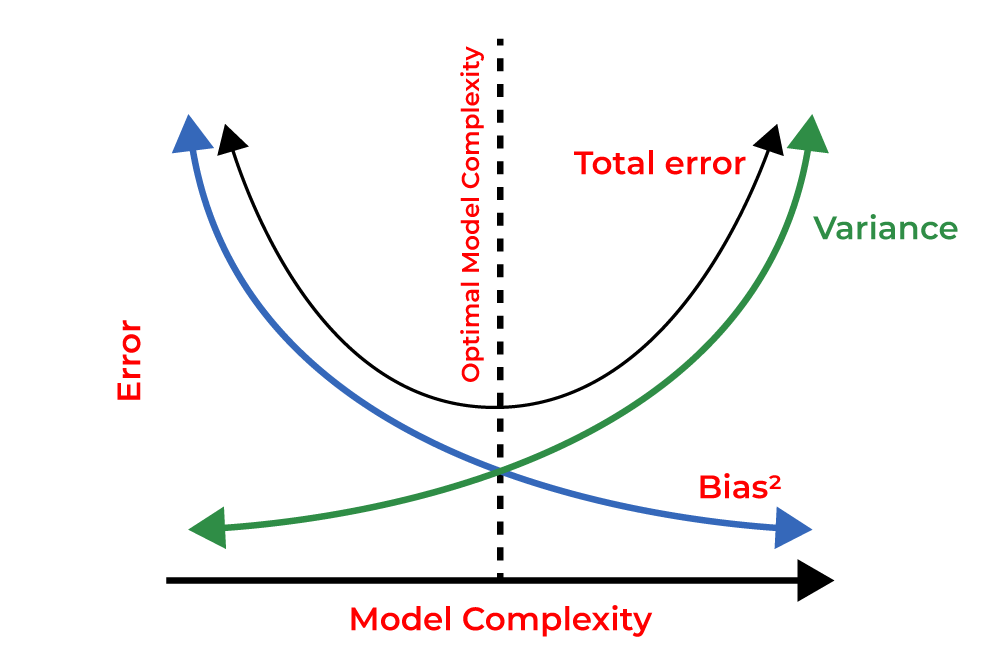

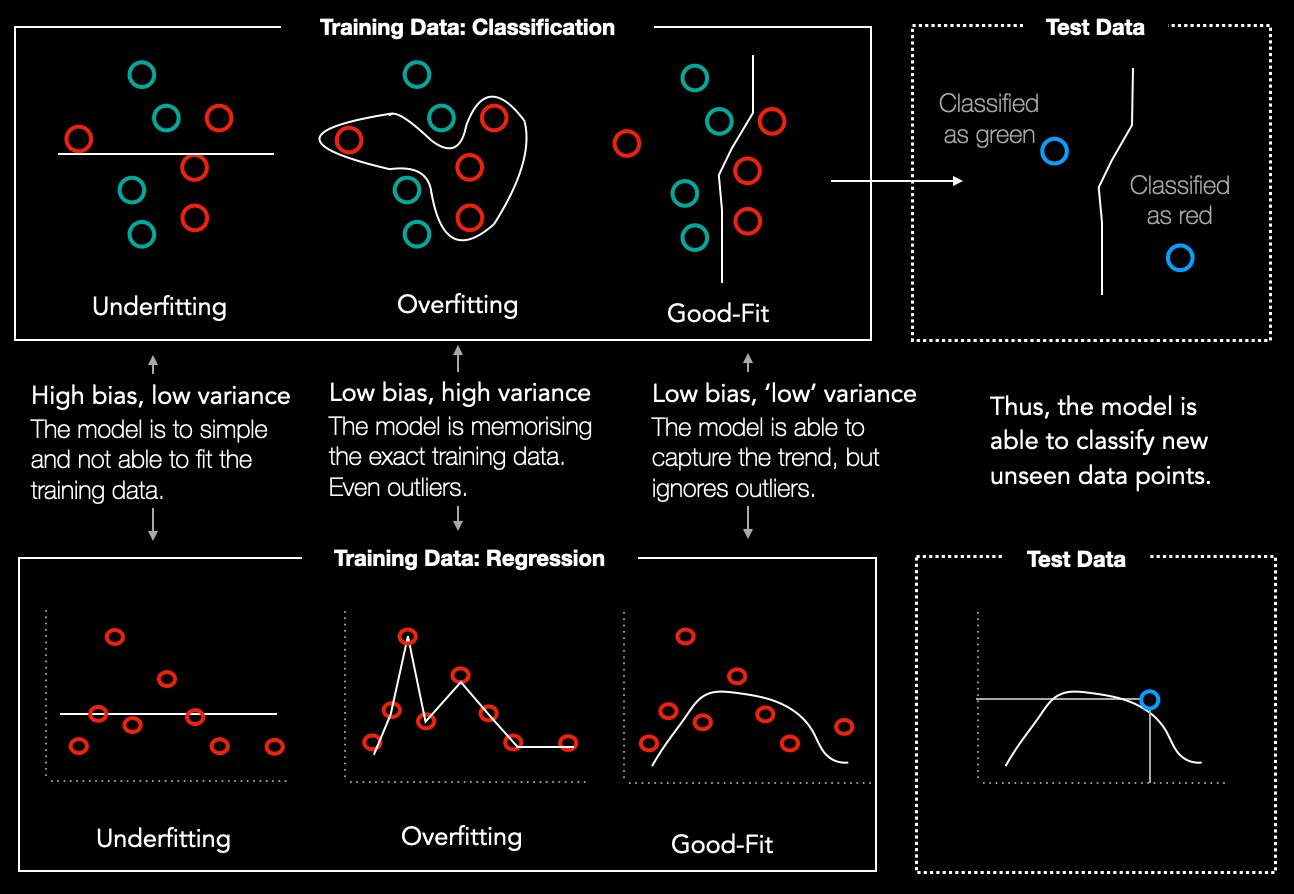

# Regularization

Regularization is a set of techniques used in training **neural networks** (and other machine learning models) to **reduce overfitting** — the situation where a model performs well on training data but poorly on unseen (validation/test) data.

##  Regularization Techniques in Neural Networks

### 1. **L2 Regularization (Weight Decay)**

* **Concept**: Adds a penalty term to the loss function proportional to the **squared values of the weights**.

* **Modified Loss Function**:

  $$
  \text{Loss} = \text{Original Loss} + \lambda \sum_i w_i^2
  $$

  where $\lambda$ is the regularization strength.

* **Why it works**: Encourages smaller weights → simpler models → reduces variance and overfitting.


### 2. **L1 Regularization**

* **Concept**: Adds a penalty proportional to the **absolute values of weights**.

  $$
  \text{Loss} = \text{Original Loss} + \lambda \sum_i |w_i|
  $$

* **Effect**: Encourages sparsity (many weights become exactly 0), which can lead to feature selection.


### 3. **Dropout**

* **Concept**: Randomly **"drops" (sets to 0)** some neurons during training at each forward pass.
* **Why it works**: Prevents neurons from co-adapting too much; forces the network to **learn redundant representations**, improving generalization.


### 4. **Early Stopping**

* **Concept**: Monitor validation loss during training and stop when it stops improving.
* **Why it works**: Avoids overfitting that happens in later epochs.


### 5. **Data Augmentation**

* **Concept**: Apply transformations to training data (e.g., rotation, flipping in images).
* **Why it works**: Increases data diversity, helping the model generalize better.


### 🎯 Summary: Why Regularization Helps

Regularization reduces overfitting by:

* Penalizing overly complex models (L1, L2)
* Introducing randomness (Dropout)
* Preventing excessive training (Early Stopping)
* Expanding training data effectively (Augmentation)

# L1 and L2 regularization

L1 and L2 regularization are two techniques used to **reduce overfitting** in machine learning models, including **neural networks**, by **penalizing large weights**.


## Why Use Regularization?

In training, models might memorize the training data (overfitting), which leads to poor generalization. Regularization discourages this by **adding a penalty to the loss function** based on the size of the weights.


## L2 Regularization (Weight Decay)

### Concept:

L2 regularization adds a **penalty equal to the sum of the squared weights** to the loss function.

### Formula:

If the original loss is:

$$
\mathcal{L}_{\text{original}} = \text{Loss(data, labels)}
$$

Then with L2 regularization:

$$
\mathcal{L}_{\text{L2}} = \mathcal{L}_{\text{original}} + \lambda \sum_{i} w_i^2
$$

* $w_i$: model weights
* $\lambda$: regularization strength (hyperparameter)

### Effect:

* Penalizes **large** weights more heavily.
* Encourages the network to use **smaller, more distributed weights**.
* Helps reduce model **complexity** and **variance**.


## L1 Regularization

### Concept:

L1 regularization adds a **penalty equal to the sum of the absolute values of the weights**.

### Formula:

$$
\mathcal{L}_{\text{L1}} = \mathcal{L}_{\text{original}} + \lambda \sum_{i} |w_i|
$$

### Effect:

* Encourages **sparsity** in the weights: many weights become exactly **0**.
* Can act as a form of **feature selection** (only important features remain).
* Leads to simpler, sparser models.


Choosing the regularization rate (the **λ** or "lambda" value) for **L2** or **L1 regularization** is important and often non-trivial — it's a **hyperparameter** that you should tune based on your data and model.


### General Strategy for Choosing λ

#### Start with a small value:

```python
λ = 1e-4 or 1e-5
```

This is common in practice for L2 (e.g., Adam with `weight_decay=1e-4`).


#### Grid Search / Hyperparameter tuning

Use **cross-validation** or a **validation set** to find the best λ:

```python
# Try a range of values (log scale is common)
lambdas = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
```

* **Too small**: no effect (still overfits)
* **Too large**: underfits, poor performance
* Plot training vs. validation loss to find the best trade-off.

## 🧠 Notes

* **L1** is sensitive — even small λ values can zero out weights.
* **Adam** and **SGD with momentum** handle `weight_decay` (L2) natively.
* Don't regularize bias terms (only weights) if doing it manually.
* Combine with **early stopping** to avoid overtraining even with good λ.


## 🔍 Comparison

| Feature      | L1 Regularization                | L2 Regularization           |   |                      |
| ------------ | -------------------------------- | --------------------------- | - | -------------------- |
| Penalty Term | ( \lambda \sum                   | w\_i                        | ) | $\lambda \sum w_i^2$ |
| Encourages   | Sparsity (many weights = 0)      | Small, but non-zero weights |   |                      |
| Optimization | Non-differentiable at zero       | Smooth and differentiable   |   |                      |
| Use Case     | Feature selection, sparse models | General overfitting control |   |                      |

# Drop out regularization

**Dropout regularization** is a popular technique used to prevent **overfitting** in neural networks by randomly "dropping out" units (along with their connections) during training.


### **Core Idea**

During training, **randomly deactivate (set to zero)** a fraction of the neurons in each layer on each forward pass. This forces the network to learn **redundant and robust representations**, preventing it from becoming too dependent on any one neuron.


### **Why Dropout Helps**

Without dropout, neurons can **co-adapt**—they rely too much on each other, which can lead to overfitting. By dropping units, we make the network learn **multiple independent pathways** and improve **generalization**.


### **How It Works**

Let’s say a layer has 100 neurons and a dropout rate of 0.5:

* During each training iteration, each neuron has a 50% chance of being **dropped** (i.e., ignored in that iteration).
* During **inference (testing)**, **no neurons are dropped**, but the outputs of each neuron are **scaled down** by the dropout rate (e.g., multiplied by 0.5) to maintain the expected value.


### **Mathematical Formulation**

Let:

* $h$ be the output vector of a hidden layer
* $r \sim \text{Bernoulli}(p)$ be a random binary mask (e.g., for dropout rate $1 - p$)

Then the dropout output is:

$$
\tilde{h} = h \cdot r
$$

And during inference, we scale:

$$
\text{inference output} = h \cdot p
$$


### **Advantages**

* Easy to implement.
* Very effective at reducing overfitting.
* Encourages redundancy and robustness.

### **Considerations**

* Dropout is used **only during training**.
* Not typically used in convolutional layers (but variants like SpatialDropout exist).
* May require **longer training time** or **learning rate tuning**.

# Data augmentation

**Data augmentation** is a technique used in machine learning, especially in training neural networks, to **increase the diversity and size of the training dataset** by applying various transformations to existing data samples. This helps improve the model's **generalization ability** and reduces **overfitting**, especially when the original dataset is small.


## Why Use Data Augmentation?

* Prevents overfitting by introducing variability.
* Helps models generalize better to unseen data.
* Allows training on more data without needing to actually collect more samples.


## Common Data Augmentation Techniques

### 1. **For Images**

| Method                    | Description                                             | Example                                       |
| ------------------------- | ------------------------------------------------------- | --------------------------------------------- |
| **Rotation**              | Rotating the image by a random angle.                   | Rotate a digit 10° clockwise.                 |
| **Flipping**              | Horizontal or vertical flipping.                        | Flip a face image horizontally.               |
| **Cropping**              | Random cropping followed by resizing.                   | Crop a corner of a cat image.                 |
| **Scaling/Zooming**       | Zoom in or out of the image.                            | Zoom in on a shirt in FashionMNIST.           |
| **Translation**           | Shifting the image along the X or Y axis.               | Move an object to the side.                   |
| **Brightness/Contrast**   | Adjusting lighting or contrast levels.                  | Brighten an underexposed photo.               |
| **Noise Injection**       | Adding random noise to simulate real-world distortions. | Gaussian noise over an image.                 |
| **Cutout/Random Erasing** | Masking out random parts of an image.                   | Hide a patch of pixels.                       |
| **Mixup**                 | Combine two images and their labels linearly.           | $\tilde{x} = \lambda x_i + (1 - \lambda) x_j$ |

### 2. **For Text (NLP)**

| Method                    | Description                                                   | Example                           |
| ------------------------- | ------------------------------------------------------------- | --------------------------------- |
| **Synonym Replacement**   | Replace words with synonyms.                                  | "Good" → "Great"                  |
| **Random Insertion/Swap** | Insert or swap words randomly.                                | "The dog barks" → "Barks the dog" |
| **Back Translation**      | Translate text to another language and back.                  | EN → FR → EN                      |
| **Text Generation**       | Use a language model to paraphrase or generate new sentences. | Use GPT to generate variants.     |

### 3. **For Tabular Data**

| Method                      | Description                                     |
| --------------------------- | ----------------------------------------------- |
| **Gaussian Noise Addition** | Add noise to numerical features.                |
| **SMOTE**                   | Generate synthetic samples for minority class.  |
| **Shuffling Values**        | Randomly shuffle feature values across samples. |
| **Interpolation**           | Combine rows to create intermediate samples.    |


## Benefits

* Increases model robustness.
* Improves accuracy and generalization.
* Acts like regularization without modifying the model.


## Considerations

* Not all transformations are meaningful for all datasets (e.g., flipping digits may confuse models).
* Too much augmentation can hurt performance if it creates unrealistic data.
* Augmentation is typically done **on-the-fly during training** to save memory.

# Early stopping

**Early stopping** is a **regularization technique** used during training of machine learning models—especially neural networks—to **prevent overfitting**.


### Concept:

When training a model, we typically monitor the **training loss** and the **validation loss** over epochs:

* Initially, both training and validation loss decrease.
* After a certain point, training loss may keep decreasing, but **validation loss starts increasing**—this is a sign of **overfitting**.
* **Early stopping stops training at the point where the validation performance is best**, before the model starts overfitting the training data.

### How It Works:

1. **Split data** into training and validation sets.
2. During training, **evaluate the model on the validation set** after every epoch.
3. **Keep track of the best validation performance** so far.
4. If validation performance doesn't improve for a predefined number of epochs (called **patience**), stop training.


### Why It's Useful:

* **Prevents overfitting**
* **Saves time** by stopping unnecessary training
* Works well in combination with other regularization techniques like dropout or weight decay